## Decision trees with the UCI Adult dataset 

### The "Adult" dataset

#### Dataset description:

UCI Adult: classify people using demographical data - whether they earn more than \$50,000 per year or not.

Dataset is in `data` folder

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**Categorical Attributes**

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

**Continuous Attributes**

age: continuous. Age of an individual

fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

Individual's working hour per week

**Target** – earnings level, categorical (binary) feature.

#### 1. Reading train and test data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data_train = pd.read_csv('data/adult_train.csv', sep=';')

In [65]:
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [66]:
data_test = pd.read_csv('data/adult_test.csv', sep=';')

In [67]:
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [68]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

#### 2. Enconde
Encode target as
```
<=50K ---> 0

>50K -----> 1
```

In [69]:
# encode target variable as integer
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

#### 3. Primary data analysis
1. Get a description in one unique table of all features and target of train
2. Get the value counts of target
3. Plot a grid of histograms of all columns (categorical included).

In [70]:
data_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Workclass,30725,8,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
Martial_Status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,30718,14,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

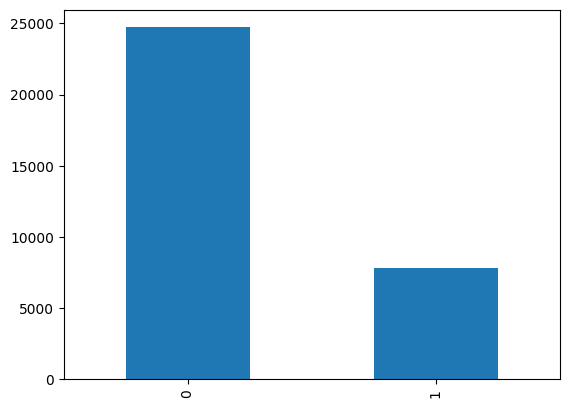

In [71]:
data_train['Target'].value_counts().plot(kind='bar')

In [72]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

ValueError: Number of rows must be a positive integer, not 3.0

<Figure size 2500x1500 with 0 Axes>

#### 4. Checking data types
1. Check the types of train and test. ¿Any difference?
2. There is an int feature in train, that is considered as object in test. Solve it
3. Cast all numeric types to the numeric types of the train

In [ ]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [73]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

As we see, in the test data, age is treated as type **object**. We need to fix this.

In [74]:
data_test['Age'] = data_test['Age'].astype(int)

Also we'll cast all **float** features to **int** type to keep types consistent between our train and test data.

In [75]:
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

#### 5. Missing data
1. Fill in missing data for continuous features with their median values
2. Fill in missing data for categorical features with their mode.

In [76]:
# we see some missing values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [77]:
# choose categorical and continuous features from data

categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [78]:
# fill missing data

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [79]:
# no more missing values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### 6. Encodig categorical
Enconde with dummies all the categorical features

We'll dummy code some categorical features: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. It can be done via pandas method **get_dummies**

In [80]:
data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns], drop_first=True)], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns], drop_first=True)], axis=1)

C:\Users\alber\AppData\Local\Temp\ipykernel_100576\762111855.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.get_dummies(data_train[categorical_columns], drop_first=True)], axis=1)
C:\Users\alber\AppData\Local\Temp\ipykernel_100576\762111855.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.get_dummies(data_test[categorical_columns], drop_first=True)], axis=1)


In [81]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [82]:
[col for col in data_train.columns if col not in data_test.columns]

['Country_ Holand-Netherlands']

In [83]:
data_train.shape, data_test.shape

((32561, 98), (16281, 97))

In [1]:
# Soluncion si en el train o test hay algun dummy que no esta en el otro
# PERO lo malo de esto es que contaminamos los conjuntos con datos del otro.
import pandas as pd
train = pd.DataFrame(data = [['a', 123, 'ab'], ['b', 234, 'bc']],
                     columns=['col1', 'col2', 'col3'])
test = pd.DataFrame(data = [['c', 345, 'ab'], ['b', 456, 'ab']],
                     columns=['col1', 'col2', 'col3'])
train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset_preprocessed = pd.get_dummies(dataset)
train_preprocessed = dataset_preprocessed[:train_objs_num]
test_preprocessed = dataset_preprocessed[train_objs_num:]

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

### Correct
train = pd.DataFrame(['A', 'B', 'A', 'C'])
test = pd.DataFrame(['B', 'A', 'D'])

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train)

enc.transform(train).toarray()
#array([[1., 0., 0.],
#       [0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 1.]])

enc.transform(test).toarray()
#array([[0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 0.]])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

#### 7. Check for any inconsistency in the columns of train and test

In [84]:
data_test['Country_ Holand-Netherlands'] = 0

In [85]:
set(data_train.columns) - set(data_test.columns)

set()

In [86]:
data_train.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_1
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
list(data_train.columns)

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Workclass_ Local-gov',
 'Workclass_ Never-worked',
 'Workclass_ Private',
 'Workclass_ Self-emp-inc',
 'Workclass_ Self-emp-not-inc',
 'Workclass_ State-gov',
 'Workclass_ Without-pay',
 'Education_ 11th',
 'Education_ 12th',
 'Education_ 1st-4th',
 'Education_ 5th-6th',
 'Education_ 7th-8th',
 'Education_ 9th',
 'Education_ Assoc-acdm',
 'Education_ Assoc-voc',
 'Education_ Bachelors',
 'Education_ Doctorate',
 'Education_ HS-grad',
 'Education_ Masters',
 'Education_ Preschool',
 'Education_ Prof-school',
 'Education_ Some-college',
 'Martial_Status_ Married-AF-spouse',
 'Martial_Status_ Married-civ-spouse',
 'Martial_Status_ Married-spouse-absent',
 'Martial_Status_ Never-married',
 'Martial_Status_ Separated',
 'Martial_Status_ Widowed',
 'Occupation_ Armed-Forces',
 'Occupation_ Craft-repair',
 'Occupation_ Exec-managerial',
 'Occupation_ Farming-fishing',
 'Occupation_ Handlers-cleaners',


In [88]:
data_test.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_1,Country_ Holand-Netherlands
1,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
data_train.columns = data_train.columns.str.replace(' ', '')
data_test.columns = data_test.columns.str.replace(' ', '')

In [90]:
data_train.columns.tolist()

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Workclass_Local-gov',
 'Workclass_Never-worked',
 'Workclass_Private',
 'Workclass_Self-emp-inc',
 'Workclass_Self-emp-not-inc',
 'Workclass_State-gov',
 'Workclass_Without-pay',
 'Education_11th',
 'Education_12th',
 'Education_1st-4th',
 'Education_5th-6th',
 'Education_7th-8th',
 'Education_9th',
 'Education_Assoc-acdm',
 'Education_Assoc-voc',
 'Education_Bachelors',
 'Education_Doctorate',
 'Education_HS-grad',
 'Education_Masters',
 'Education_Preschool',
 'Education_Prof-school',
 'Education_Some-college',
 'Martial_Status_Married-AF-spouse',
 'Martial_Status_Married-civ-spouse',
 'Martial_Status_Married-spouse-absent',
 'Martial_Status_Never-married',
 'Martial_Status_Separated',
 'Martial_Status_Widowed',
 'Occupation_Armed-Forces',
 'Occupation_Craft-repair',
 'Occupation_Exec-managerial',
 'Occupation_Farming-fishing',
 'Occupation_Handlers-cleaners',
 'Occupation_Machine-op-inspct',


#### 8. Divide train and test in features and target

In [92]:
data_train['Target'] = data_train['Target_1']
data_train.drop(columns=['Target_1'], inplace=True)

data_test['Target'] = data_test['Target_1']
data_test.drop(columns=['Target_1'], inplace=True)

In [93]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

In [94]:
print("TRAIN:", X_train.shape)
print("TEST:", X_test.shape)

TRAIN: (32561, 97)
TEST: (16281, 97)


#### 9. Decision tree

Train a decision tree **(DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter **random_state = 17** for results reproducibility.

In [97]:
X_train = X_train[sorted(X_train.columns)]
X_test = X_test[sorted(X_test.columns)]

In [98]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

Make a prediction with the trained model on the test data.

In [99]:
tree_predictions = tree.predict(X_test) 

In [100]:
accuracy_score(y_test, tree_predictions)

0.8447884036607088

In [102]:
y_test.shape

(16281,)

In [104]:
y_fake = np.array([0]*y_test.shape[0])

In [107]:
accuracy_score(y_test, y_fake)

0.7637737239727289

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

print(classification_report(y_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12435
           1       0.76      0.51      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.81      0.73      0.76     16281
weighted avg       0.84      0.84      0.83     16281



In [120]:
print(classification_report(y_test, y_fake))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

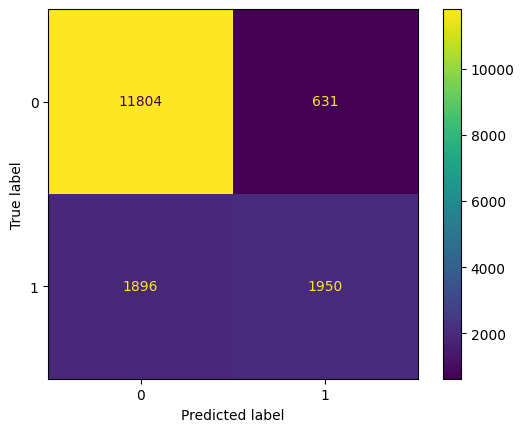

In [116]:
cm = confusion_matrix(y_test, tree_predictions, labels=tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree.classes_)
disp.plot();

In [118]:
recall_score(y_test, tree_predictions)

0.5070202808112324

In [119]:
precision_score(y_test, tree_predictions)

0.7555211158465711

In [121]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, tree_predictions)

0.7281382063485192

In [122]:
roc_auc_score(y_test, y_fake)

0.5

In [123]:
accuracy_score(y_test, y_fake)

0.7637737239727289

In [125]:
from sklearn.metrics import f1_score

f1_score(y_test, y_fake, average='macro')

0.4330338487254492

In [126]:
f1_score(y_test, tree_predictions, average='macro')

0.7550623685607003

In [127]:
recall_score(y_test, y_fake)

0.0

In [128]:
recall_score(y_test, tree_predictions)

0.5070202808112324

#### 10. Check the documentation on DecissionTreeClassifier and tune the hyperparameters in orther to get better predictions
Hyperparameters that you can tune: splitter, max_depth, min_samples_split, min_samples_leaf, max_features...

In [152]:
tree = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
tree.fit(X_train, y_train)

parameters = {'min_samples_leaf': np.arange(1, 100, 5)}

grid_tree = GridSearchCV(tree, parameters, scoring='f1', cv = 5)

grid_tree.fit(X_train, y_train)
print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.6649839684706362
{'min_samples_leaf': 51}


In [153]:
tree = DecisionTreeClassifier(random_state=0, **grid_tree.best_params_)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_test)
accuracy_score(y_test, tree_predictions)

0.8589153000429949

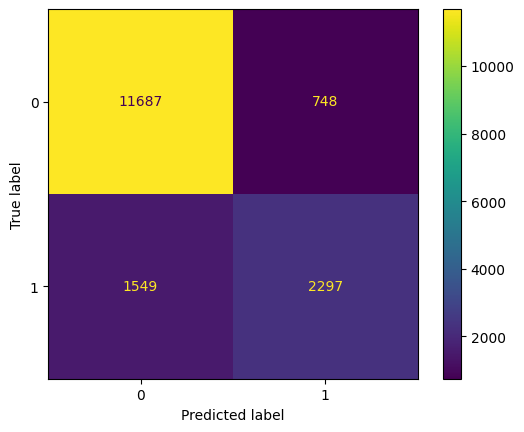

In [154]:
cm = confusion_matrix(y_test, tree_predictions, labels=tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, tree_predictions),
                              display_labels=tree.classes_)
disp.plot();